1. Installing and importing dependencies

In [1]:
pip install torch torchvision torchaudio

  Using cached torch-2.3.1-cp312-cp312-win_amd64.whl.metadata (26 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
Using cached torch-2.3.1-cp312-cp312-win_amd64.whl (159.7 MB)
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.2 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 9.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ------------------------ --------------- 1.4/2.4 MB 44.8 MB/s eta 0:00:01
   ---------------------------------------  2.4/2.4 MB 37.2 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 25.0 MB/s eta 0:00:00
Using cached mkl-2021.4.0-py2.py3-none-win_amd

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

     ---------------------------------------- 0.0/41.2 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.2 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 41.2/41.2 kB 499.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/802.7 kB ? eta -:--:--
   --------------------------------------  798.7/802.7 kB 24.6 MB/s eta 0:00:01
   --------------------------------------- 802.7/802.7 kB 16.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/931.1 kB ? eta -:--:--
   --------------------------------------  921.6/931.1 kB 29.4 MB/s eta 0:00:01
   --------------------------------------- 931.1/931.1 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

2. Loading model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\aaran/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-20 Python-3.12.4 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

3. Make detections with images

In [11]:
img = 'https://www.telegraph.co.uk/content/dam/news/2023/01/15/TELEMMGLPICT000322063156_trans_NvBQzQNjv4BqpVlberWd9EgFPZtcLiMQf0Rf_Wk3V23H2268P_XkPxc.jpeg?imwidth=680'

In [12]:
results = model(img)
results.print()

image 1/1: 425x680 19 cars, 1 bus, 2 trucks
Speed: 1107.9ms pre-process, 148.2ms inference, 0.0ms NMS per image at shape (1, 3, 416, 640)


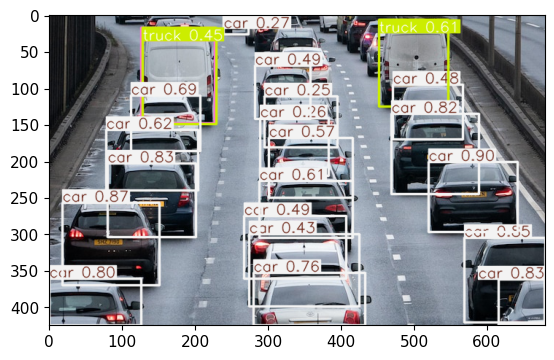

In [13]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [14]:
results.xyxy

[tensor([[5.20234e+02, 2.01189e+02, 6.42876e+02, 2.97867e+02, 8.96014e-01, 2.00000e+00],
         [1.82618e+01, 2.57617e+02, 1.51490e+02, 3.70329e+02, 8.72570e-01, 2.00000e+00],
         [5.69520e+02, 3.05471e+02, 6.80000e+02, 4.21704e+02, 8.49549e-01, 2.00000e+00],
         [6.16632e+02, 3.62199e+02, 6.79525e+02, 4.24758e+02, 8.33430e-01, 2.00000e+00],
         [8.06702e+01, 2.03737e+02, 2.01714e+02, 3.04801e+02, 8.32825e-01, 2.00000e+00],
         [4.69058e+02, 1.35659e+02, 5.89576e+02, 2.45420e+02, 8.16439e-01, 2.00000e+00],
         [0.00000e+00, 3.61187e+02, 1.26937e+02, 4.25000e+02, 8.03985e-01, 2.00000e+00],
         [2.80956e+02, 3.53681e+02, 4.33047e+02, 4.25000e+02, 7.63110e-01, 2.00000e+00],
         [1.12810e+02, 1.10829e+02, 2.07641e+02, 1.86145e+02, 6.90047e-01, 2.00000e+00],
         [7.88631e+01, 1.57783e+02, 2.04850e+02, 2.40653e+02, 6.16967e-01, 2.00000e+00],
         [4.52546e+02, 6.84233e+00, 5.47619e+02, 1.25148e+02, 6.14070e-01, 7.00000e+00],
         [2.88363e+02

In [15]:
results.show

<bound method Detections.show of YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 425x680 19 cars, 1 bus, 2 trucks
Speed: 1107.9ms pre-process, 148.2ms inference, 0.0ms NMS per image at shape (1, 3, 416, 640)>

4. Real Time Detections

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

5. Training from Scratch

In [5]:
import uuid #unique identifier
import os
import time

In [4]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [7]:
for label in labels:
    print(label)

awake
drowsy


In [8]:
cap = cv2.VideoCapture(0)
#Loop through labels
for label in labels:
    print('Collecting images for {}'.format(labels))
    time.sleep(5)

    #loop through number of images
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        #webcam feed
        ret, frame = cap.read()
        
        #Naming the image path
        img_name = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1())+'.jpg')
        
        #writes out image to file
        cv2.imwrite(img_name, frame)
        
        #Render to the screen
        cv2.imshow('Image Collection', frame)
        
        #2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [9]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [5]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl.metadata (552 bytes)
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB 8.9 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/6.9 MB 14.5 MB/s eta 0:00:01
   ------------- -------------------------- 2.3/6.9 MB 18.6 MB/s eta 0:00:01
   ------------------- -------------------- 3.3/6.9 MB 18.9 MB/s eta 0:00:01
   ------------------------ --------------- 4.1/6.9 MB 20.4 MB/s eta 0:00:01
   ----------------------------- ---------- 5.1/6.9 MB 20.5 MB/s eta 0:00:01
   ---------------------------------- ----- 6.0/6.9 MB 20.1 MB/s eta 0:00:01
   ---------------------------------------  6.9/6.9 MB 20.9 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 17.6 MB/s eta 0:00:00
Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)
   ---------------------------------------- 0.0/57.9 kB ? eta -:--:--
   ---------------------------

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 420 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=420, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'C:\Users\aaran\Desktop\Applications': No such file or directory
YOLOv5  2024-7-17 Python-3.12.4 torch-2.3.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, we

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\aaran\anaconda3\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\aaran\anaconda3\Lib\asyncio\selector_events.py", line 132, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\aaran\anaconda3\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\aaran\anaconda3\Lib\asyncio\selector_events.py", line 132, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionReset

6. Loading Models

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp3/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\aaran/.cache\torch\hub\master.zip
YOLOv5  2024-7-29 Python-3.12.4 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [6]:
img = os.path.join('data', 'images', 'awake.8edd3822-4588-11ef-b2fd-80b6559cf017.jpg')

In [7]:
results = model(img)

In [8]:
results.print()

image 1/1: 480x640 1 awake
Speed: 39.4ms pre-process, 167.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


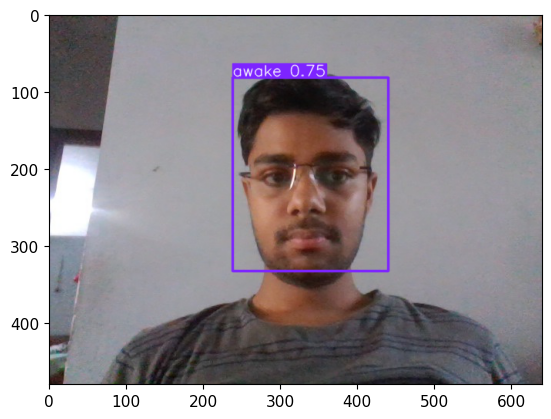

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [3]:
#Real time detection

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()